In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [28]:
company = pd.read_csv("Company_Data.csv")

In [29]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [30]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [31]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [32]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [33]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [34]:
company1 = company
company1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [35]:
print("length: ",len(company1['Sales']))
print('mean : ',company1['Sales'].mean())
company1['Sales'].sort_values()

length:  400
mean :  7.496325000000001


174     0.00
106     0.16
165     0.37
143     0.53
57      0.91
       ...  
18     13.91
367    14.37
25     14.90
316    15.63
376    16.27
Name: Sales, Length: 400, dtype: float64

In [36]:
company['highsales'] = np.where((company1['Sales'] < 9),'Low','High')
company['highsales'] = label_encoder.fit_transform(company['highsales'])
company2 = company1.iloc[:,1:]
company2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


Decession Tree

In [37]:
array = company2.values
x = array[: , :-1]
y = array[: , -1]

In [38]:
x

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]])

In [39]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [41]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [42]:
#predicting
predict = model.predict(x_test)
pd.Series(predict).value_counts()

1    106
0     14
dtype: int64

In [43]:
pd.crosstab(y_test,predict)

col_0,0,1
row_0,,
0,9,23
1,5,83


In [44]:
np.mean(predict == y_test)

0.7666666666666667

[Text(0.5, 0.875, 'x[4] <= 90.5\nentropy = 0.872\nsamples = 280\nvalue = [82, 198]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\nentropy = 0.89\nsamples = 39\nvalue = [27, 12]'),
 Text(0.125, 0.375, 'x[0] <= 118.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.1875, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.375, 0.375, 'x[7] <= 15.5\nentropy = 0.529\nsamples = 25\nvalue = [22, 3]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.75, 0.625, 'x[2] <= 6.5\nentropy = 0.775\nsamples = 241\nvalue = [55, 186]'),
 Text(0.625, 0.375, 'x[0] <= 147.0\nentropy = 0.369\nsamples = 127\nvalue = [9, 118]'),
 Text(0.5625, 0.125, 'entropy = 0.176\nsamples = 114\nvalue = [3, 111]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.875, 0.375, 'x[5] <= 0.5\nentropy = 0.973\nsamples = 114\

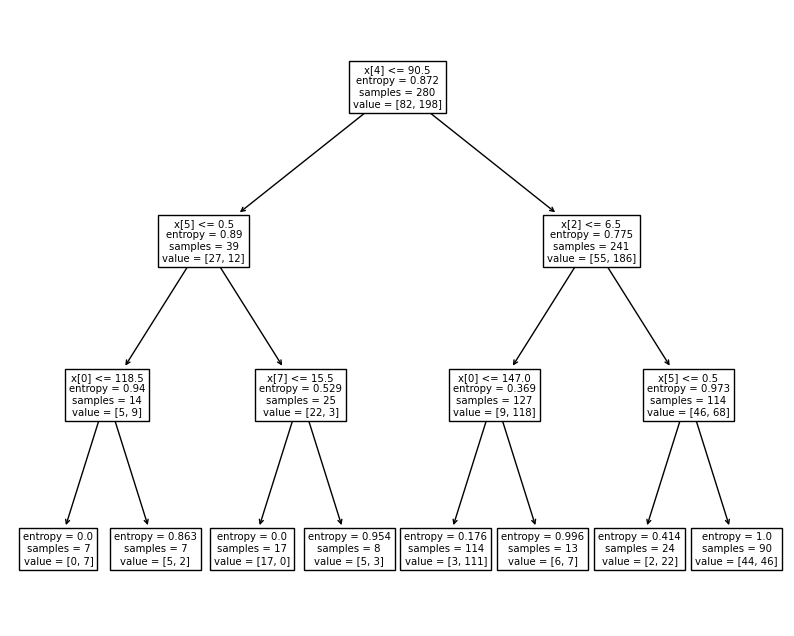

In [45]:
plt.figure(figsize=(10,8))
tree.plot_tree(model)

[Text(0.5, 0.875, 'x[4] <= 90.5\nentropy = 0.872\nsamples = 280\nvalue = [82, 198]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\nentropy = 0.89\nsamples = 39\nvalue = [27, 12]'),
 Text(0.125, 0.375, 'x[0] <= 118.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.1875, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.375, 0.375, 'x[7] <= 15.5\nentropy = 0.529\nsamples = 25\nvalue = [22, 3]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.75, 0.625, 'x[2] <= 6.5\nentropy = 0.775\nsamples = 241\nvalue = [55, 186]'),
 Text(0.625, 0.375, 'x[0] <= 147.0\nentropy = 0.369\nsamples = 127\nvalue = [9, 118]'),
 Text(0.5625, 0.125, 'entropy = 0.176\nsamples = 114\nvalue = [3, 111]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.875, 0.375, 'x[5] <= 0.5\nentropy = 0.973\nsamples = 114\

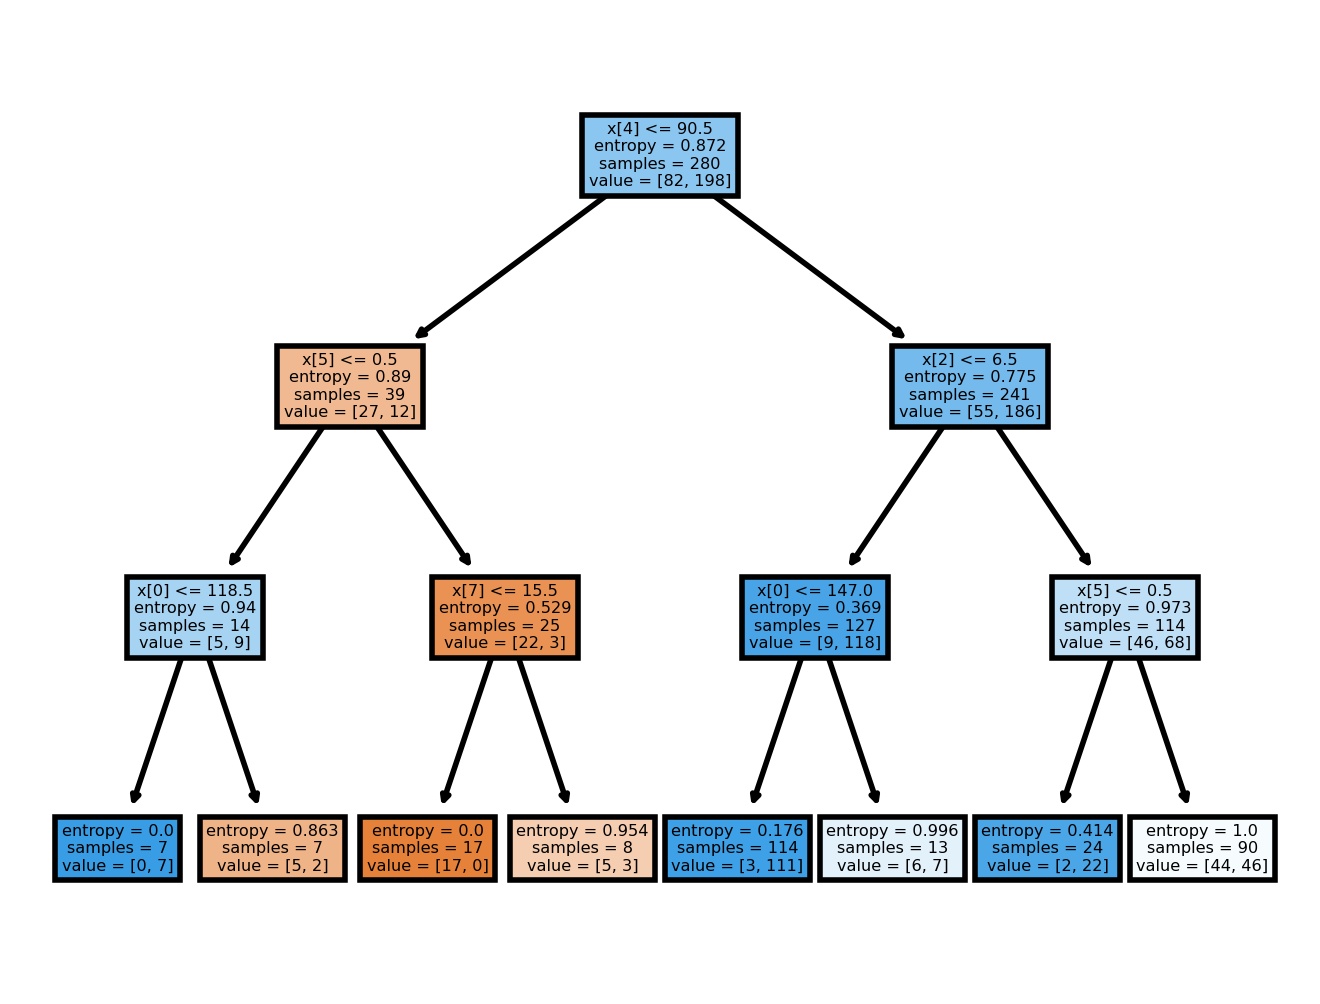

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,3) , dpi=400)
tree.plot_tree(model,
               filled = True)

In [47]:
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth =3)

In [48]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[4] <= 90.5\ngini = 0.414\nsamples = 280\nvalue = [82, 198]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.125, 0.375, 'x[0] <= 118.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.1875, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.375, 0.375, 'x[7] <= 15.5\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.75, 0.625, 'x[2] <= 6.5\ngini = 0.352\nsamples = 241\nvalue = [55, 186]'),
 Text(0.625, 0.375, 'x[0] <= 147.0\ngini = 0.132\nsamples = 127\nvalue = [9, 118]'),
 Text(0.5625, 0.125, 'gini = 0.051\nsamples = 114\nvalue = [3, 111]'),
 Text(0.6875, 0.125, 'gini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.875, 0.375, 'x[5] <= 0.5\ngini = 0.481\nsamples = 114\nvalue = [46, 68]'),
 Text(0.8125, 0.

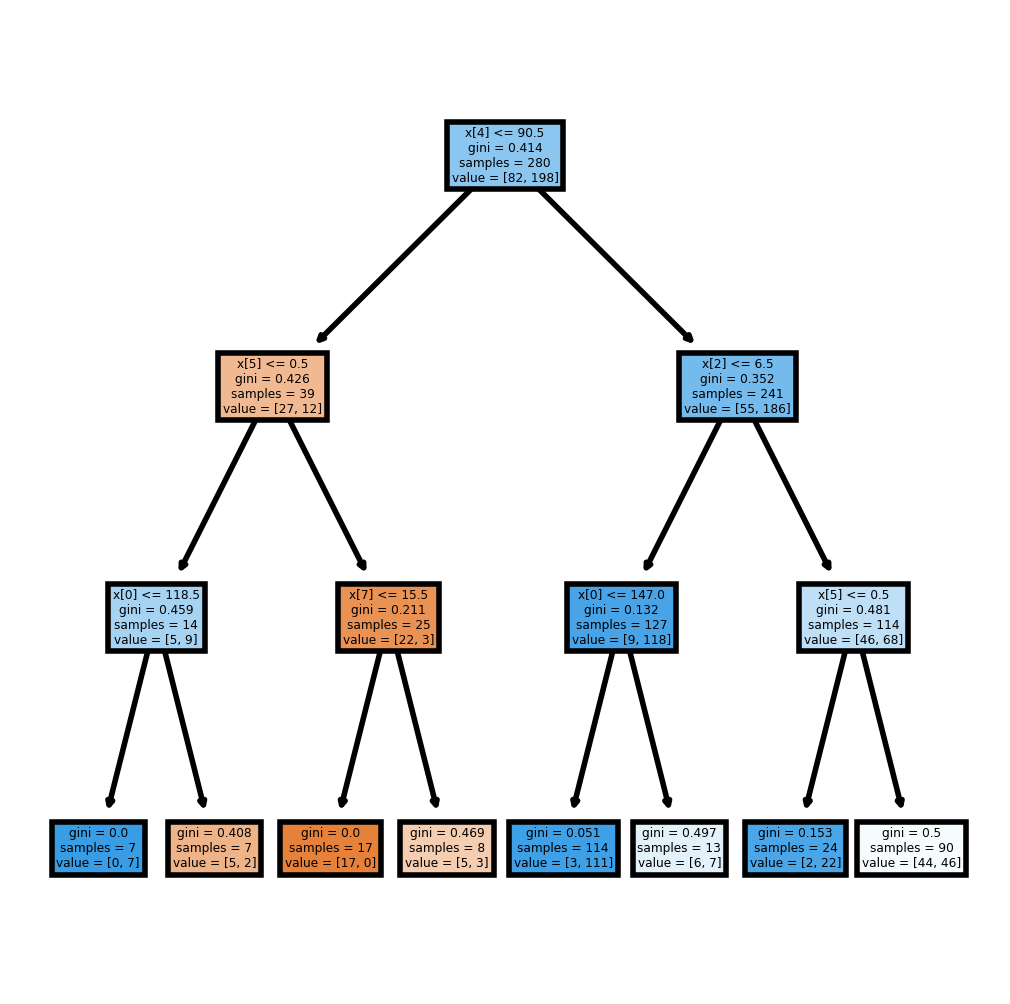

In [51]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3) , dpi=400)
tree.plot_tree(model1,
               filled = True)

In [50]:
pred1 = model1.predict(x_test)
np.mean(pred1 == y_test)

0.7666666666666667